#### Load Libraries

In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

#### Load Dataset

In [11]:
header = list(range(1, 17))
header = ["letter"] + header

letter_df_complete = pd.read_csv('../../Data/letter-recognition.data', 
sep = ",", 
names = header)

letter_df_complete.head()

,letter,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


#### Describe features

In [5]:
letter_df_complete.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


c:\Users\Florentina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

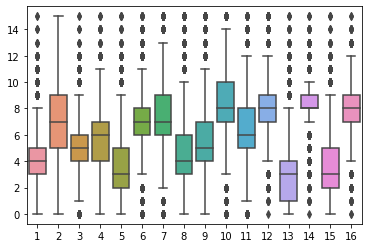

In [12]:
features = list(range(1, 17))

sns.boxplot(data=letter_df_complete)

C:\Users\FLOREN~1\AppData\Local\Temp/ipykernel_20944/2072930640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = letter_df_complete.corr()


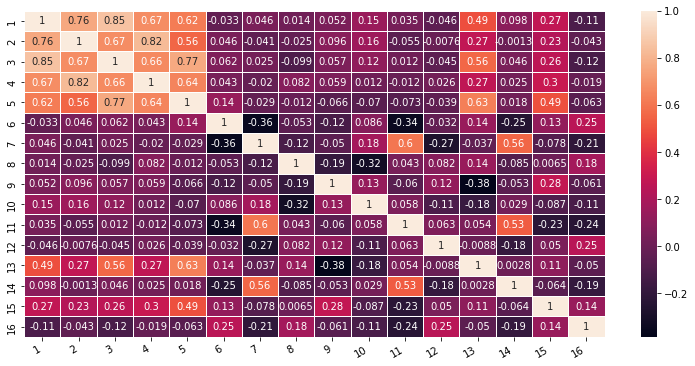

In [14]:
corrmat = letter_df_complete.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [21]:
letter_grouped = letter_df_complete.groupby("letter", group_keys=True).mean()

letter_grouped.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,4.020486,7.035371,5.117671,5.372373,3.503566,6.897577,7.492794,4.623926,5.189631,8.286678,6.442371,7.948892,3.037842,8.334757,3.704962,7.810333
std,0.577865,0.217499,0.771841,0.259138,0.781588,1.143696,1.817647,1.594791,1.696307,1.403565,2.081922,1.548837,1.803360,1.147959,1.753830,0.841690
min,2.270199,6.404853,2.631788,5.169713,1.825166,4.800263,3.592641,1.940397,2.043093,4.959264,2.338403,4.191781,0.537748,6.135101,1.458493,6.300251
25%,3.870603,6.956444,4.879511,5.212033,3.007659,6.088056,6.840332,3.457074,4.001198,7.603674,5.654552,7.390219,1.905716,7.840013,2.175701,7.429486
50%,4.069903,7.053038,5.108391,5.292197,3.494976,7.080264,7.097853,4.410108,5.207242,7.963177,6.033459,7.866190,2.887969,8.177142,3.476050,7.680891
75%,4.270455,7.155170,5.373706,5.386890,4.014829,7.535819,8.080205,5.956771,6.454920,8.706776,7.324207,8.512965,3.563293,8.857146,5.055597,8.362664
max,5.168883,7.441176,6.637626,6.408685,5.267677,9.665328,11.369347,7.282903,9.196185,12.168675,10.942408,11.947011,8.154040,10.610687,7.152589,9.470976


In [37]:
feat = 13

#print(letter_grouped.loc[letter_grouped[feat] == min(letter_grouped[feat])])
#print(letter_grouped.loc[letter_grouped[feat] == max(letter_grouped[feat])])

print(letter_grouped.loc[letter_grouped[feat] <= letter_grouped[feat].quantile(0.25)])

#print(letter_grouped.loc[letter_grouped[feat] >= letter_grouped[feat].quantile(0.75)])

               1         2         3         4         5         6          7  \
letter                                                                          
F       3.832258  7.009032  4.898065  5.209032  3.178065  4.913548  10.454194   
I       2.270199  6.980132  2.631788  5.209272  1.825166  7.458278   7.035762   
J       2.970549  6.799197  3.994645  5.614458  2.315930  9.665328   5.666667   
L       3.417871  7.128778  4.356110  5.296978  2.649146  4.800263   3.592641   
S       4.101604  7.441176  5.044118  5.450535  3.486631  7.811497   6.945187   
T       3.996231  7.125628  4.820352  5.193467  2.858040  6.428392  11.369347   
Z       3.737057  6.764305  4.878747  5.634877  3.250681  7.525886   7.125341   

               8         9         10        11        12        13        14  \
letter                                                                          
F       3.476129  4.886452  11.242581  7.830968  5.723871  1.736774  9.117419   
I       1.940397  5.973510 

In [58]:
letter_grouped_res = letter_grouped.copy()

letter_grouped_res = letter_grouped[letter_grouped.index.isin(['A', 'L', 'R', 'T'])]
letter_grouped_res['letter'] = letter_grouped_res.index
letter_grouped_res_plot = letter_grouped_res[['letter', 7, 11, 13, 16]]
print(letter_grouped_res_plot)

       letter          7        11        13        16
letter                                                
A           A   3.631179  2.338403  2.771863  7.468948
L           L   3.592641  2.545335  1.106439  7.651774
R           R   8.122691  4.320580  3.624011  9.470976
T           T  11.369347  9.316583  1.600503  6.300251


C:\Users\FLOREN~1\AppData\Local\Temp/ipykernel_20944/1910268780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  letter_grouped_res['letter'] = letter_grouped_res.index


In [87]:
def rescale(x):
    return (x - np.min(x)) / np.ptp(x)

l_res = (
    letter_df_complete.groupby('letter').agg(
        mean_vert_pos = (7, np.mean),
        mean_squared_hor_dist = (11, np.mean),
        mean_edges = (13, np.mean),
        sum_horizont_pos = (16, np.mean)
    )
    .apply(lambda x: rescale(x))
    .reset_index()
)

l_res = l_res[l_res["letter"].isin(['A', 'M','R', 'T'])]

print(l_res)

   letter  mean_vert_pos  mean_squared_hor_dist  mean_edges  sum_horizont_pos
0       A       0.004955               0.000000    0.293334          0.368590
12      M       0.362003               0.520075    1.000000          0.384356
17      R       0.582515               0.230378    0.405218          1.000000
19      T       1.000000               0.811039    0.139537          0.000000


Text(0.1, 1, 'Radar Plot of Letters')

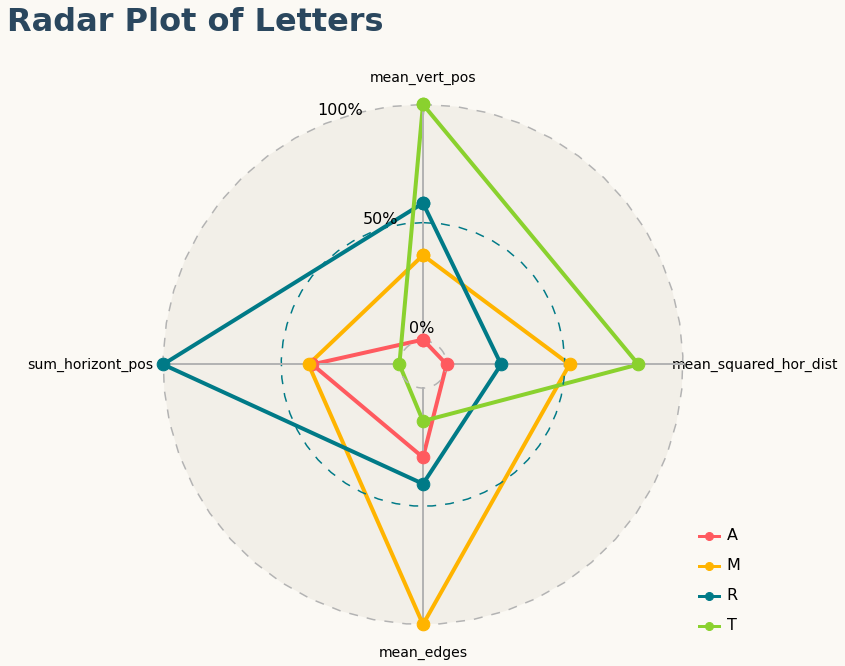

In [88]:
#The labels refer to number 7, 11, 13, and 16
labels = ["Mean vert pos", "Mean squared hor. dist", "Mean edges", "Sum of horizontal positions"]

from matplotlib.lines import Line2D

BG_WHITE = "#fbf9f4"
BLUE = "#2a475e"
GREY70 = "#b3b3b3"
GREY_LIGHT = "#f2efe8"
#COLORS = ["#FF5A5F", "#FFB400", "#007A87"]
COLORS = ["#FF5A5F", "#FFB400", "#007A87", "#8ad12e"]

# The three species of penguins
LETTERS = l_res["letter"].values.tolist()

# The four variables in the plot
VARIABLES = l_res.columns.tolist()[1:]
VARIABLES_N = len(VARIABLES)

# The angles at which the values of the numeric variables are placed
ANGLES = [n / VARIABLES_N * 2 * np.pi for n in range(VARIABLES_N)]
ANGLES += ANGLES[:1]

# Padding used to customize the location of the tick labels
X_VERTICAL_TICK_PADDING = 5
X_HORIZONTAL_TICK_PADDING = 50    

# Angle values going from 0 to 2*pi
HANGLES = np.linspace(0, 2 * np.pi)

# Used for the equivalent of horizontal lines in cartesian coordinates plots 
# The last one is also used to add a fill which acts a background color.
H0 = np.zeros(len(HANGLES))
H1 = np.ones(len(HANGLES)) * 0.5
H2 = np.ones(len(HANGLES))

# Initialize layout ----------------------------------------------
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, polar=True)

fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Rotate the "" 0 degrees on top. 
# There it where the first variable, avg_bill_length, will go.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Setting lower limit to negative value reduces overlap
# for values that are 0 (the minimums)
ax.set_ylim(-0.1, 1.05)

# Plot lines and dots --------------------------------------------
for idx, letters in enumerate(LETTERS):
    values = l_res.iloc[idx].drop("letter").values.tolist()
    values += values[:1]
    ax.plot(ANGLES, values, c=COLORS[idx], linewidth=4, label=letters)
    ax.scatter(ANGLES, values, s=160, c=COLORS[idx], zorder=10)

# Set values for the angular axis (x)
ax.set_xticks(ANGLES[:-1])
ax.set_xticklabels(VARIABLES, size=14)

# Remove lines for radial axis (y)
ax.set_yticks([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add custom lines for radial axis (y) at 0, 0.5 and 1.
ax.plot(HANGLES, H0, ls=(0, (6, 6)), c=GREY70)
ax.plot(HANGLES, H1, ls=(0, (6, 6)), c=COLORS[2])
ax.plot(HANGLES, H2, ls=(0, (6, 6)), c=GREY70)

# Now fill the area of the circle with radius 1.
# This create the effect of gray background.
ax.fill(HANGLES, H2, GREY_LIGHT)

# Custom guides for angular axis (x).
# These four lines do not cross the y = 0 value, so they go from 
# the innermost circle, to the outermost circle with radius 1.
ax.plot([0, 0], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi, np.pi], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi / 2, np.pi / 2], [0, 1], lw=2, c=GREY70)
ax.plot([-np.pi / 2, -np.pi / 2], [0, 1], lw=2, c=GREY70)

# Add levels -----------------------------------------------------
# These labels indicate the values of the radial axis
PAD = 0.05
ax.text(-0.4, 0 + PAD, "0%", size=16, fontname="Roboto")
ax.text(-0.4, 0.5 + PAD, "50%", size=16, fontname="Roboto")
ax.text(-0.4, 1 + PAD, "100%", size=16, fontname="Roboto")

# Create and add legends -----------------------------------------
# Legends are made from scratch.

# Iterate through species names and colors.
# These handles contain both markers and lines.
handles = [
    Line2D(
        [], [], 
        c=color, 
        lw=3, 
        marker="o", 
        markersize=8, 
        label=species
    )
    for species, color in zip(LETTERS, COLORS)
]

legend = ax.legend(
    handles=handles,
    loc=(1, 0),       # bottom-right
    labelspacing=1.5, # add space between labels
    frameon=False     # don't put a frame
)

# Iterate through text elements and change their properties
for text in legend.get_texts():
    text.set_fontname("Roboto") # Change default font 
    text.set_fontsize(16)       # Change default font size

# Adjust tick label positions ------------------------------------
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[0::2]:
    tick.set_pad(X_VERTICAL_TICK_PADDING)
    
for tick in XTICKS[1::2]:
    tick.set_pad(X_HORIZONTAL_TICK_PADDING)

# Add title ------------------------------------------------------
fig.suptitle(
    "Radar Plot of Letters",
    x = 0.1,
    y = 1,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)


<AxesSubplot:xlabel='letter'>

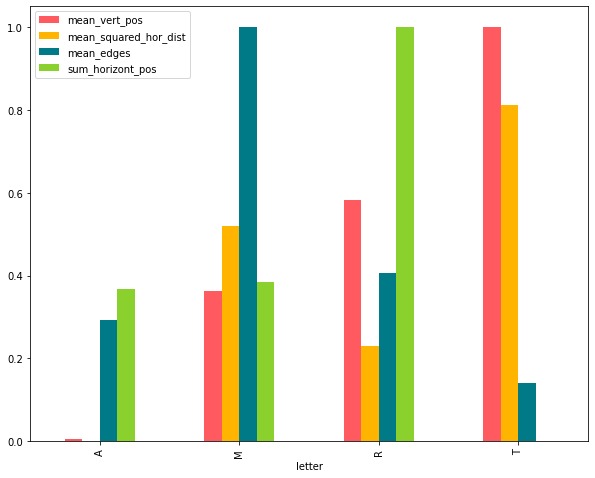

In [125]:
X_axis = np.arange(len(l_res.columns)-1)
X = list(l_res.columns)
X.remove('letter')

l_res.plot(x = "letter", y = X, kind = "bar", figsize=(10, 8), color=["#FF5A5F", "#FFB400", "#007A87", "#8ad12e"])